In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold,learning_curve
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import time
from scipy import stats
from tqdm import tqdm

In [7]:
# Load the data
mb_raw_data = pd.read_csv('../data/mann_bruker.txt', sep='\t')

# Keep only necessary columns
mb_clean_frame = mb_raw_data[['Sequence', 'CCS','Mass','Charge','Length']]

mb_clean_frame_grouped = mb_clean_frame.groupby(['Sequence', 'Charge']).agg({'Mass':'median', 'CCS':'median','Length':'median'}).reset_index()

    

def calculate_percent_error(row):
    sequence = row['Sequence']
    charge = row['Charge']
    ccs = row['CCS']
    
    # Find the respective sequence and charge in the grouped dataset
    grouped_row = mb_clean_frame_grouped[(mb_clean_frame_grouped['Sequence'] == sequence) & (mb_clean_frame_grouped['Charge'] == charge)]
    
    # Calculate the percent error of ccs
    percent_error = abs((ccs - grouped_row['CCS'].values[0]) / grouped_row['CCS'].values[0]) * 100
    
    return percent_error
tqdm.pandas()
# Apply the function to each row in the dataframe
mb_clean_frame['Percent_Error_CCS'] = mb_clean_frame.progress_apply(calculate_percent_error, axis=1)



100%|██████████| 440762/440762 [2:12:51<00:00, 55.29it/s]  
C:\Users\Simon\AppData\Local\Temp\ipykernel_29544\1168953691.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_clean_frame['Percent_Error_CCS'] = mb_clean_frame.progress_apply(calculate_percent_error, axis=1)


In [9]:
print(mb_clean_frame['Percent_Error_CCS'].max())

98.9091245913548


In [13]:
print(mb_clean_frame[mb_clean_frame['Percent_Error_CCS'] != 0]['Percent_Error_CCS'].mean())

0.5883513145535384


In [14]:
print(mb_clean_frame[mb_clean_frame['Percent_Error_CCS'] != 0]['Percent_Error_CCS'].median())

0.12147320106164265


In [6]:
mb_clean_frame

,Sequence,CCS,Mass,Charge,Length,Percent_Error_CCS
0,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,2.654046e-35,4401.106890,4,52,0.000000
1,AAAAAAAAAK,5.996674e-36,785.439552,1,10,0.111098
2,AAAAAAAAAK,5.956918e-36,785.439552,1,10,0.552614
3,AAAAAAAAAK,5.996673e-36,785.439552,1,10,0.111081
4,AAAAAAAAAK,5.970114e-36,785.439552,1,10,0.332315
...,...,...,...,...,...,...
440757,YYYQGCASWK,1.742139e-35,1324.554660,2,10,0.000000
440758,YYYVCQYCPAMKTYLNK,2.726609e-35,2264.010450,3,17,0.000006
440759,YYYVCQYCPAMKTYLNK,2.726609e-35,2264.010450,3,17,0.000006
440760,YYYVPADFVEYEK,1.524399e-35,1684.766090,2,13,0.000020


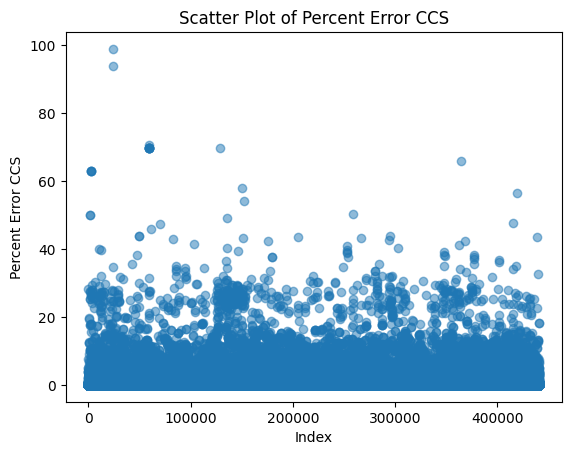

In [14]:
# Create a scatter plot of the 'Percent_Error_CCS' column with alpha
plt.scatter(mb_clean_frame.index, mb_clean_frame['Percent_Error_CCS'], alpha=0.5)

# Add a title and labels
plt.title('Scatter Plot of Percent Error CCS')
plt.xlabel('Index')
plt.ylabel('Percent Error CCS')

# Show the plot
plt.show()


In [16]:
mb_clean_frame.to_csv('../data/mann_bruker_error.txt', sep='\t', index=False)

In [3]:
mb_clean_frame = pd.read_csv('../data/mann_bruker_error.txt', sep='\t')

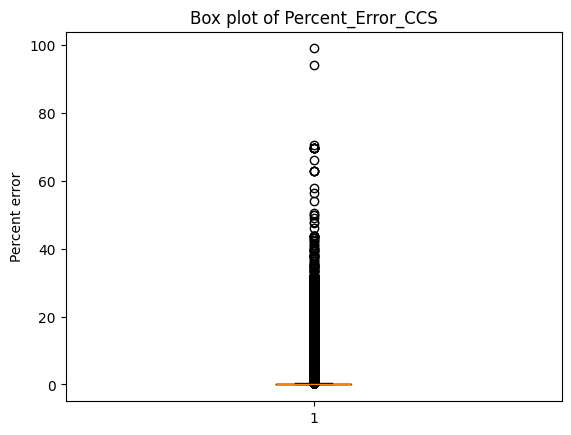

<Figure size 2400x1800 with 0 Axes>

In [16]:

# Assuming 'mb_clean_frame' is your DataFrame and 'Percent_Error_CCS' is your column
data = mb_clean_frame['Percent_Error_CCS']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

# Set the labels for x and y axis

ax.set_ylabel('Percent error')

# Set the title of the plot
ax.set_title('Box plot of Percent_Error_CCS')

# Set the DPI to display (not save)
plt.figure(figsize=(8, 6), dpi=300)
plt.show()
